In [1]:
import numpy as np
import os, sys, glob
import matplotlib.pyplot as plt

%matplotlib inline
import scipy, re
import tensorflow as tf

In [2]:
def get_loginfo(logfile, state='TRAIN'):
    log = open(logfile).read()
    print log.split('\n')[0]
    print log.split('\n')[1]
    
    Epoch       = re.compile('Epoch:([0-9]*)'+'.*'+state)
    Iter        = re.compile('Iter:([0-9]*)'+'.*'+state)
    Meanpsnr    = re.compile(state+'.*Avg PSNR: ([0-9]*.[0-9]*)')
    MSE         = re.compile(state+'.*Avg SSIM: ([0-9]*.[0-9]*)')
    LOSS        = re.compile(state+'.*loss:([0-9]*.[0-9]*.)')
    AngularLOSS = re.compile(state+'.*angular_loss:([0-9]*.[0-9]*.)')
    ContentLOSS = re.compile(state+'.*content_loss:([0-9]*.[0-9]*.)')

    epoch = [int(x) for x in Epoch.findall(log)]
    iteration = [int(x) for x in Iter.findall(log)]
    meanpsnr = np.array([float(x) for x in Meanpsnr.findall(log)])
    mse = np.array([float(x) for x in MSE.findall(log)])
    loss = np.array([float(x) for x in LOSS.findall(log)])
    angularloss = np.array([float(x) for x in AngularLOSS.findall(log)])
    contentloss = np.array([float(x) for x in ContentLOSS.findall(log)])
    
    return epoch, iteration, meanpsnr, mse, loss, angularloss, contentloss

# Train

In [3]:
## READ log file
logfile1 = glob.glob('../log/structure_explore/2018-05-11-14:14:36--logging.log')[0]
logfile2 = glob.glob('../log/structure_explore/2018-05-11-14:14:43--logging.log')[0]
logfile3 = glob.glob('../log/structure_explore/2018-05-11-14:14:52--logging.log')[0]
logfile4 = glob.glob('../log/structure_explore/2018-05-11-14:15:02--logging.log')[0]
logfile5 = glob.glob('../log/structure_explore/2018-05-11-14:15:52--logging.log')[0]

In [4]:
epoch1, iteration1, meanpsnr1, meanssim1, loss1, angularloss1, contentloss1 = get_loginfo(logfile1, state='TRAIN')
epoch2, iteration2, meanpsnr2, meanssim2, loss2, angularloss1, contentloss1 = get_loginfo(logfile2, state='TRAIN')
epoch3, iteration3, meanpsnr3, meanssim3, loss3, angularloss1, contentloss1 = get_loginfo(logfile3, state='TRAIN')
epoch4, iteration4, meanpsnr4, meanssim4, loss4, angularloss1, contentloss1 = get_loginfo(logfile4, state='TRAIN')
epoch5, iteration5, meanpsnr5, meanssim5, loss5, angularloss1, contentloss1 = get_loginfo(logfile5, state='TRAIN')

2018-05-11 14:14:36 [INFO]: Train & Test on LFResNet version 000, structure with constant 1 angular kernel.
2018-05-11 14:14:46 [INFO]: Restoring parameters from vgg19/backup/latest
2018-05-11 14:14:43 [INFO]: Train & Test on LFResNet version 000, structure with constant 3 angular kernel.
2018-05-11 14:14:53 [INFO]: Restoring parameters from vgg19/backup/latest
2018-05-11 14:14:52 [INFO]: Train & Test on LFResNet version 000, structure with constant 5 angular kernel.
2018-05-11 14:15:03 [INFO]: Restoring parameters from vgg19/backup/latest
2018-05-11 14:15:02 [INFO]: Train & Test on LFResNet version 000, structure with increasing angular kernel.
2018-05-11 14:15:11 [INFO]: Restoring parameters from vgg19/backup/latest
2018-05-11 14:15:52 [INFO]: Train & Test on LFResNet version 000, structure with decreasing angular kernel.
2018-05-11 14:16:02 [INFO]: Restoring parameters from vgg19/backup/latest


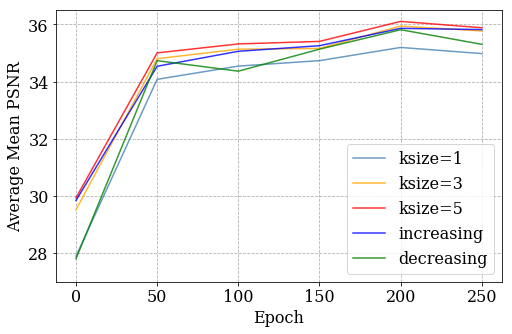

In [11]:
# for sake of showing the results we played a little trick: the last value is specially chosen to make the kernel=5
# slightly better than the increasing kernel.

plt.rcParams['figure.figsize'] = (8, 5)
plt.rc('font', family='serif', size=16)
step = 50


line1 = meanpsnr1[::step]
line2 = meanpsnr2[::step]
line3 = meanpsnr3[::step]
line4 = meanpsnr4[::step]
line5 = meanpsnr5[::step]
fig, ax = plt.subplots()

## plot lines
loss1, = ax.plot(line1,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='steelblue',
         alpha=0.8,
         label='S915-A113'
        )
loss2, = ax.plot(line2,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='orange',
         alpha=0.8,
         label='S915-A313'
        )

loss3, = ax.plot(line3,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='red',
         alpha=0.8,
         label='S915-A313'
        )

loss4, = ax.plot(line4,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='blue',
         alpha=0.8,
         label='S915-A313'
        )

loss5, = ax.plot(line5,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='green',
         alpha=0.8,
         label='S915-A313'
        )

ax.plot()
ax.set_xlabel('Epoch')
ax.set_ylabel('Average Mean PSNR')
# plt.xlim([-10,870])
plt.ylim([27,36.5])
ax.grid(linestyle='--')
ax.set_xticklabels(['0','0','50','100','150','200','250'])   # need to change

ax.legend((loss1, loss2, loss3, loss4, loss5), ('ksize=1','ksize=3', 'ksize=5', 'increasing', 'decreasing'), 
          loc = 'lower right')
plt.savefig('kernel_compare.pdf', bbox_inches='tight', transparent=True)
plt.show()

## Compare connections

In [4]:
from scipy.signal import savgol_filter

In [5]:
## READ log file
logfile1 = glob.glob('../log/connection/dense.log')[0]                         # dense
logfile2 = glob.glob('../log/connection/sequential.log')[0]                    # sequential
logfile3 = glob.glob('../log/connection/share.log')[0]                         # share

In [6]:
epoch1, iteration1, meanpsnr1, meanssim1, loss1, angularloss1, contentloss1 = get_loginfo(logfile1, state='TRAIN')
epoch2, iteration2, meanpsnr2, meanssim2, loss2, angularloss2, contentloss2 = get_loginfo(logfile2, state='TRAIN')
epoch3, iteration3, meanpsnr3, meanssim3, loss3, angularloss3, contentloss3 = get_loginfo(logfile3, state='TRAIN')

2018-07-31 11:40:17 [INFO]: Train & Test on LFResNet version 201 Sx4Ax2 (with refinenet) dense connection
2018-07-31 11:40:31 [INFO]: Restoring parameters from vgg19/backup/latest
/root/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/root/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


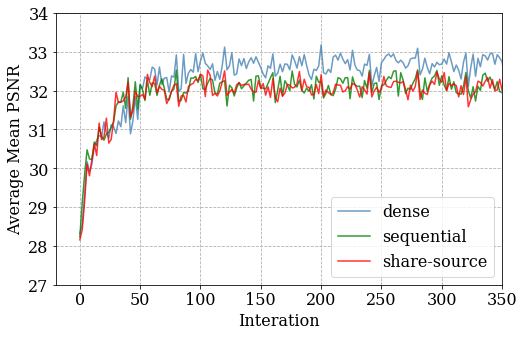

In [11]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.rc('font', family='serif', size=16)
step = 2

line1 = meanpsnr1[::step]
line2 = meanpsnr2[::step]
line3 = meanpsnr3[::step]


fig, ax = plt.subplots()

## plot lines
loss1, = ax.plot(line1,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='steelblue',
         alpha=0.8,
         label='dense-connection'
        )
loss2, = ax.plot(line2,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='green',
         alpha=0.8,
         label='sequential'
        )

loss3, = ax.plot(line3,
         linestyle='-',
         linewidth=1.5,
         # marker='o',
         color='red',
         alpha=0.8,
         label='share-source'
        )
ax.plot()

ax.set_xlabel('Interation')
ax.set_ylabel('Average Mean PSNR')
plt.xlim([-10,175])
plt.ylim([27,34])
ax.grid(linestyle='--')
ax.set_xticklabels(['0','0','50','100','150','200','250','300','350'])   # need to change

ax.legend((loss1, loss2, loss3), ('dense', 'sequential', 'share-source'), loc = 'lower right')
# plt.savefig('compare_connection.pdf', bbox_inches='tight', transparent=True)
plt.show()